In [1]:
#imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from PIL import Image

## Notebook Overview

This is a draft ~1 notebook of characterization parameters for the Sony sensor board. The parameters in question are as follows:

- Focal Length
    - def = distance between the point of convergance of light rays in the lens to the sensor board
- Half Angle [Angle of View]
    - Angle of largest image width, angle created at the lens corresponding to field of view (fixed)
- Ground Sample Distance
    - def = distance between the centers of two adjacent pixels measured on the ground
- Altitude
    - imaging altitudes
- Field of View
    - width of an image at a certain distance from the lens, depends on angle of view (non-fixed)
- Dynamic Range
    - ratio of highest to lowest radiance measurable (for our purposes, nano watts to watts)
    
Error estimations will come after veriffying that all preceeding steps look O.K.

### Test Image

First uploading an (admittedly) nonideal, but usable, test image. This image was taken hurridly, so please excuse the shotty placement and lighting. 

This image was taken in an office of known dimension, and of a black board with known dimensions, to use as a reference for certain parameter calculations. Higher quality + verification coming soon.

In [2]:
#loading the .jpg, getting usable data arrays for future use.

img_frame = Image.open('2022-02-25_165100_559.jpeg')
npframe = np.array(img_frame.getdata())
img_rgbdf = pd.DataFrame(npframe)
#img_rgbdf
#img_frame

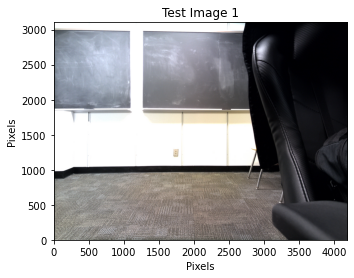

In [3]:
#displaying the image, sufficient for now

plt.imshow(img_frame)
plt.gca().invert_yaxis()
plt.xlabel('Pixels');
plt.ylabel('Pixels');
plt.title('Test Image 1');

### Focal Length

From what I can find, this value- for an imaging sensor- is defined as the distance between the convering point in the lens and the imaging sensor [where as for a lone lens it is lens -> focal point]. My est. for this distance on the Sony sensor is ~20 mm

In [4]:
fl = 20 #mm

### Half Angle

Short hand:
- half sensor width = H.S.W
- focal length = fl

First Formula: 
- $\frac{AofV}{2}$ = arctan($\frac{H.S.W}{fl}$)

Both of the qualities are defined, but with less accuracy than the known width of the image (m) and the distance the image was taken at, so instead I will use:
- half image width = H.I.W
- half imaging dist. = F.A [essentially the flight altitude]

Second Formula:
- $\frac{AofV}{2}$ = arctan($\frac{H.I.W}{F.A}$)

In [5]:
F_A = 3.5 #m
H_S_W = 0.0047 / 2 #m (4.696 mm unrounded), 4192 pixels (horizontal) * 1.12µm pixel width
H_I_W = 5 / 2 #m

ha = math.degrees(np.arctan(H_I_W / F_A))
print('Half Angle: ', round(ha, 2), 'deg')

#Using the first formula yielded an alarming small value, this seems far more reasonable.

Half Angle:  35.54 deg


### Ground Spample Distance

Short hand notation:
- flight altitude = F.A
- sensor width = S.W
- focal length = fl
- image width = I.W

First Formula: 
- GSD = $\frac{F.A * S.W}{fl * I.W}$

In [6]:
F_A = 3.5 #m
S_W = 0.0047 #m (4.696 mm unrounded), 4192 pixels (horizontal) * 1.12µm pixel width
I_W = 5 #m
fl_m = 0.02 #fl in m

gsd_test_img = (F_A * S_W)/(fl_m * I_W)
print('Ground Sample Distance [test image]: ', round(gsd_test_img, 2), 'm')

#This value says that, for the sample image, there are 16 cm between adjacent pixel centers. 
#This seems reasonable for this scale, so now need to scale up for the birds. 
#It will be helpful to have Angle of View first, so have an idea of image width. 

F_A_bird_alt = 2000000 #m, we discussed imaging at alt's higher and lower, this is a testing middle ground alt
#I_W_bird_alt = 
#gsd_flight_est = (F_A_bird_alt * S_W)/(fl_m * I_W_bird_alt)
#print('Ground Sample Distance [flight est.]: ', round(gsd, 2), 'm')

Ground Sample Distance [test image]:  0.16 m


### Altitude

Need to input different altitudes, go back and find GSD + HA for each. 

In [7]:
#Imaging at 1000 km, 3500 km, are we imaging at lower alt's [550, de-orbit alt]?
#alt_1 = 
#alt_2 = 
#alt_3 = 

## What does GSD + Altitude + the sensor tell us about our Field of View?

### Field of View

In [8]:
#Field of View

#alt_1

#alt_2

#alt_3

## Dark Images to Look for Hot Spots 
##### Less Pressing, Ignore for Now

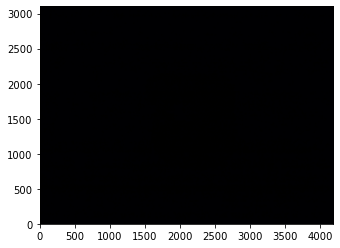

In [10]:
img_155428_040_dark = plt.imread('2022-02-25_155428_040.jpeg')
plt.imshow(img_155428_040_dark)
plt.gca().invert_yaxis()